### Summary
This notebook implements what we learn in lesson 1 from fastai Deep Learning course.

In [0]:
#Automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import matplotlib.pyplot as plt

In [0]:
PATH = '/content/selected_gd_data/'
# image size may need to adjust
sz = 224

#### Deciding Learning Rate

In [0]:
arch = resnet34
data = ImageClassifierData.from_paths(path = PATH, 
                                      tfms = tfms_from_model(arch, sz),
                                      trn_name = 'imgtrain',
                                      val_name = 'imgval')
learn = ConvLearner.pretrained(arch, data, precompute = True)
# try a broad range of learning rate
# source: https://forums.fast.ai/t/lr-find-not-working/19673/3
lrf = learn.lr_find(1e-7,1e2)

 80%|███████▉  | 149/187 [00:03<00:00, 53.47it/s, loss=9.54]


In [0]:
??image_gen

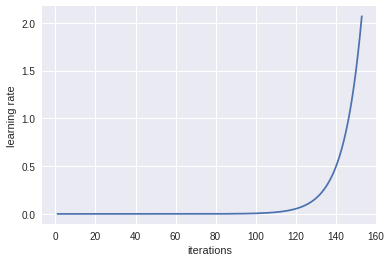

In [0]:
learn.sched.plot_lr()

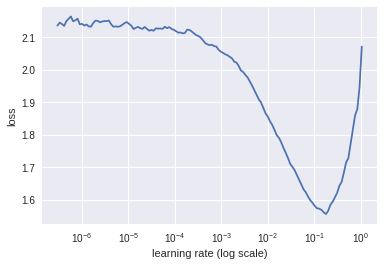

In [0]:
# Find the learning rate with highest decrease in loss function
# From the graph, lr = 0.01 is appropriate
learn.sched.plot()

#### Train Model

In [0]:
arch = resnet34
data = ImageClassifierData.from_paths(path = PATH, 
                                      tfms = tfms_from_model(arch, sz),
                                      trn_name = 'imgtrain',
                                      val_name = 'imgval')
learn = ConvLearner.pretrained(arch, data, precompute = True)
# learning rate = 0.01, epoch = 3
# learning rate, epoch needs to be decided
learn.fit(0.01, 20)

epoch      trn_loss   val_loss   accuracy   
    0      0.939117   0.780009   0.696262  
    1      0.856149   0.72302    0.699599  
    2      0.781754   0.684274   0.730975  
    3      0.752114   0.665741   0.744326  
    4      0.722918   0.655008   0.752336  
    5      0.682688   0.656139   0.747664  
    6      0.665908   0.626745   0.767023  
    7      0.623885   0.615985   0.764352  
    8      0.630582   0.602697   0.768358  
    9      0.602014   0.592307   0.774366  
    10     0.571978   0.586343   0.779706  
    11     0.54819    0.56698    0.791055  
    12     0.54171    0.57354    0.782377  
    13     0.524701   0.561161   0.791055  
    14     0.496227   0.543424   0.800401  
    15     0.503096   0.54089    0.793725  
    16     0.465613   0.546137   0.799733  
    17     0.449913   0.548442   0.798398  
    18     0.438071   0.522863   0.803071  
    19     0.431462   0.522613   0.810414  



[array([0.52261]), 0.8104138853393983]

#### Analysis of Results

In [0]:
log_preds = learn.predict()
log_preds.shape

(1498, 5)

In [0]:
preds = np.argmax(log_preds, axis = 1)
probs = np.exp(log_preds[:,1])

In [0]:
def rand_by_mask(mask):
  return np.random.choice(np.where(mask)[0], 4, replace = False)

def rand_by_correct(is_correct):
  return rand_by_mask((preds == data.val_y) == is_correct)

In [0]:
def plot_val_with_title(idxs, titles):
  imgs = np.stack([data.val_ds[x][0] for x in idxs])
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(data.val_ds.denorm(imgs, rows = 1, title = probs))

In [0]:
def plots(ims, figsize = (12, 6), rows = 1, titles = None):
  f = plt.figure(figsize = figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows, len(ims)//rows, i+1)
    sp.axis('Off')
    if titles is not None:
      sp.set_title(titles[i], fontsize = 16)
    plt.imshow(ims[i]);

In [0]:
def load_img_id(ds, idx):
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
  imgs = [load_img_id(data.val_ds, x) for x in idxs]
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(imgs, rows = 1, titles = title_probs, figsize = (16, 8))

Correctly Classified


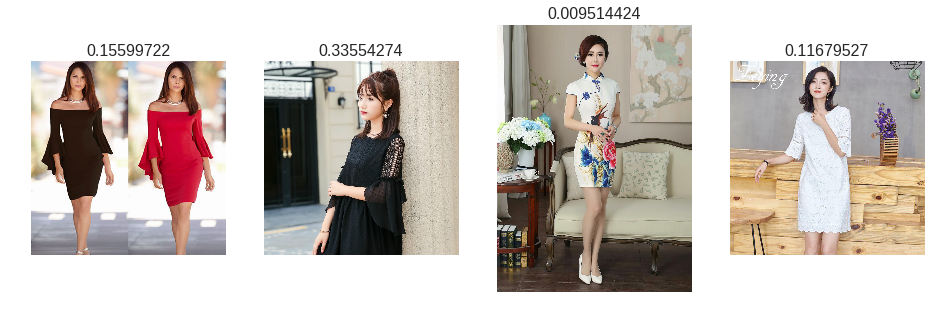

In [0]:
# A few examples of correctly classified (dog)
plot_val_with_title(rand_by_correct(True), "Correctly Classified")